**Replace with your name and a brief description of the notebook.**

# Homework 1

This assignment uses a dataset of all New York City active dog licenses issued after Jan. 1, 2019 (and last updated August, 2021).

The file can be downloaded from https://github.com/megan-owen/MAT328-Techniques_in_Data_Science/raw/main/data/NYC_Dog_Licensing_Dataset_Jan2019.csv
or can be filtered and downloaded from the original source https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp/data by:

1. click on "Filter" in the menu to the right, above the data table
2. click on "Add a New Filter Condition"
3. click on "RowNumber" (in the right side area that appears) to change it to "LicenseIssuedDate"
4. click on "is" to change it to "is after"
5. click on the text box just below "LicenseIssuedDate is after" to select Jan. 1, 2019.
6. click on "Export" in the menu to the right, just above the data table
7. click on "CSV" under "Download" in the menu that appears

Answer the following questions for the data, showing all outputs of your code in the notebook.

All plots should have an appropriate title and axes labels.

## Question 0: Load the data

Put any import statements, and load the dog licensing data from the CSV file here.  The column `Point_time` should stored as dates.


In [2]:
import pandas as pd

In [25]:
# Load in the data
dog_license_data = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/NYC_Dog_Licensing_Dataset_Jan2019.csv")

# Convert columns to DateTime object
dog_license_data["LicenseIssuedDate"] = pd.to_datetime(dog_license_data["LicenseIssuedDate"])
dog_license_data["LicenseExpiredDate"] = pd.to_datetime(dog_license_data["LicenseExpiredDate"])

# Preview data
dog_license_data.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,Unique Dog ID
0,184,FRANKIE,M,2004,Unknown,NaN,10465,2019-01-02,2020-01-30,NaN,NaN
1,609,QUE,M,2004,Unknown,NaN,11205,2019-01-02,2019-11-29,NaN,NaN
2,736,JAKE,M,2005,Unknown,NaN,10309,2019-01-02,2019-12-30,NaN,NaN
3,757,OPHELIA,F,2006,Unknown,NaN,10310,2019-01-02,2019-10-30,NaN,NaN
4,1021,CINDY,F,2003,Shih Tzu,NaN,11416,2019-01-02,2019-07-29,NaN,NaN


### Question 1
Do any of the columns have missing data?  If so, which ones and how do you know?  To get summary information about qualitative columns (ex. text, dates) pass the parameter `include = ["O"]` into the function `.describe()`.

In [26]:
dog_license_data.describe()

,RowNumber,AnimalBirthMonth,Borough,ZipCode,Extract Year,Unique Dog ID
count,147204.000000,147204.000000,0.0,147204.000000,0.0,0.0
mean,73692.191075,2014.410750,NaN,10714.973961,NaN,NaN
std,42543.191332,4.466134,NaN,1039.019102,NaN,NaN
min,1.000000,1980.000000,NaN,0.000000,NaN,NaN
25%,36837.750000,2011.000000,NaN,10033.000000,NaN,NaN
50%,73693.500000,2015.000000,NaN,10471.000000,NaN,NaN
75%,110544.250000,2018.000000,NaN,11229.000000,NaN,NaN
max,147345.000000,2021.000000,NaN,98433.000000,NaN,NaN


<b>Answer:</b> The columns `Borough`, `Extract Year`, and `Unique Dog ID` all have missing values because their "count" attribute is less than the shape of the data (147,204).

### Question 2
Plot a bar chart of the distribution of the days of the week that licenses were issued.  (Hint:  see Lab 1, Section 7, and Monday = 0, Sunday = 6)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
# Assign new column with day of week labels
dog_license_data['day_of_week'] = dog_license_data['LicenseIssuedDate'].dt.day_name()

Text(0, 0.5, 'Number of dog licenses issued')

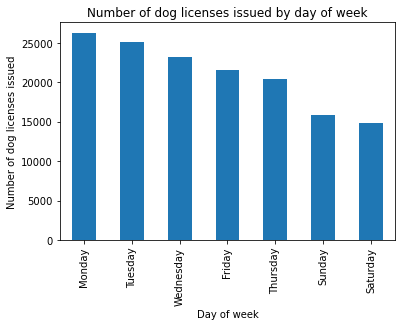

In [40]:
dow_data = dog_license_data['day_of_week'].value_counts()
dow_data.plot(kind="bar")
plt.title("Number of dog licenses issued by day of week")
plt.xlabel("Day of week")
plt.ylabel("Number of dog licenses issued")

Which day of the week are the the most licenses issued?  Do you notice any other trends?

<b>Answer:</b> Monday saw the most licenses issued. One trend that is apparent is that Saturday and Sunday (the weekend) had the least amount of licenses issued of all the days of the week.

### Question 3
The column `AnimalBirthMonth` actually holds the year the dog was born.  Plot a histogram of the distribution of the birth years.

Text(0, 0.5, 'Number of dogs born')

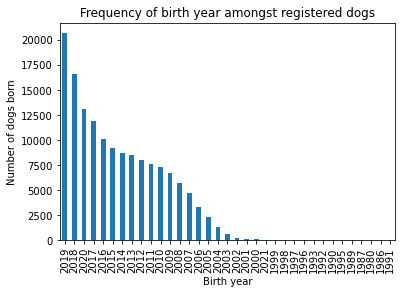

In [42]:
dog_birth_year_data = dog_license_data['AnimalBirthMonth'].value_counts()
dog_birth_year_data.plot(kind='bar')
plt.title("Frequency of birth year amongst registered dogs")
plt.xlabel("Birth year")
plt.ylabel("Number of dogs born")

What do you notice about this distibution? What might be the cause?

<b>Answer:</b> 2019 had the highest number of dogs born (as relates to those registered dogs) and 1991 had the lowest. I wonder if the pandemic had anything to do with this as there were [many articles](https://www.washingtonpost.com/nation/2020/08/12/adoptions-dogs-coronavirus/) that talked about a surge in dog adoptions during the pandemic.

### Question 4
Make a bar chart of the distribution of the gender of dogs licensed in April.

Text(0, 0.5, 'Count')

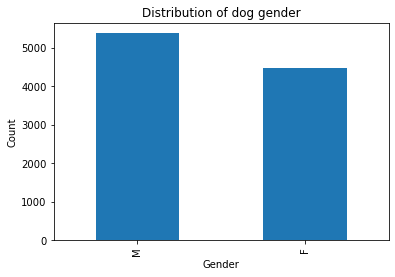

In [49]:
# Subset data by those who were licensed in April
april_dogs = dog_license_data[dog_license_data['LicenseIssuedDate'].dt.month == 4]

# Plot a bar graph of their genders
gender_dist_april = april_dogs['AnimalGender'].value_counts()
gender_dist_april.plot(kind='bar')
plt.title("Distribution of dog gender")
plt.xlabel("Gender")
plt.ylabel("Count")

Do you think there is a significant difference in the number of male and female dogs? Why/why not? What could you do to be more sure? (Note: actually doing this analysis is a bonus question)

<b>Answer:</b> There is not that significant of a difference between the distribution of the two genders. Though I am unsure as to why, I do not think there could be many contributing factors other than breed type as there are often breed restricions for housing in the city.

### Question 5

Let's see whether the supposed increase in people getting puppies during the pandemic shows up in the dog licensing data. 

a) First, compute the means of the birth years of dogs licensed in February 2019 and dogs licensed in February 2020.

In [63]:
# Subset the data by month/year
feb_2019_data = dog_license_data[(dog_license_data['LicenseIssuedDate'] >= "2019-02-01") & (dog_license_data['LicenseIssuedDate'] <= "2019-02-28")]
feb_2020_data = dog_license_data[(dog_license_data['LicenseIssuedDate'] >= "2020-02-01") & (dog_license_data['LicenseIssuedDate'] <= "2020-02-28")]

In [68]:
feb_2019_mean = feb_2019_data['AnimalBirthMonth'].mean()
feb_2020_mean = feb_2020_data['AnimalBirthMonth'].mean()

In [74]:
print(f"""February 2019 mean: {int(feb_2019_mean)}
February 2020 mean: {int(feb_2020_mean)}
""")

February 2019 mean: 2013
February 2020 mean: 2014



How do the means change?  Both of these means are from before the pandemic.  What explains their difference?

<details><summary>Hint:</summary>
What is the mean *age* of the dogs being licensed in both cases?
</details>

<b>Answer:</b> In both years, the mean age of the licensed dogs in 6 years old.

5b) Next, compute the means of the birth years of dogs licensed in June 2019 and dogs licensed in June 2020.

In [77]:
june_2019_data = dog_license_data[(dog_license_data['LicenseIssuedDate'] >= "2019-06-01") & (dog_license_data['LicenseIssuedDate'] <= "2019-06-30")]
june_2020_data = dog_license_data[(dog_license_data['LicenseIssuedDate'] >= "2020-06-01") & (dog_license_data['LicenseIssuedDate'] <= "2020-06-30")]

In [78]:
june_2019_mean = june_2019_data['AnimalBirthMonth'].mean()
june_2020_mean = june_2020_data['AnimalBirthMonth'].mean()

In [80]:
print(f"""June 2019 mean: {int(june_2019_mean)}
June 2020 mean: {int(june_2020_mean)}
""")

June 2019 mean: 2013
June 2020 mean: 2016



How do these two means change?  Can the explaination for the difference between the February 2019 and February 2020 means also explain this difference?

<b>Answer:</b> In June of 2019, the average age was 6 years old. In June of 2020, the average age was 4 years old. This may be because the pandemic boom prompted people to adopt/license younger dogs.

### Bonus question:
Conduct a hypothesis test to see if there is actually a difference in the number of male and female dogs licensed in April.

Hint:  See MAT 128 Lab 14 since this is not reviewed in MAT 328 Lab 1.